In [26]:
import os
cwd = os.getcwd()
cwd

'/content'

>Download train.csv from here
>
>> https://www.kaggle.com/c/digit-recognizer/data
>
>and unzip it inside a new folder named ***"large_files"***

>$$X \sim N(\mu, \Sigma)$$
>
> $X \in R^{m \times n}$
>
> * $m$: number of examples
>
> * $n$: number of dimensions (for MNIST, $28 \times 28 = 784$ dimensions) 
>
> Mean $\mu \in R^{n}$
>
> Covariance matrix $\Sigma \in [-1,1]^{n \times n}$

In [10]:
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import util


In [11]:
X, y = util.get_mnist()

Reading in and transforming data...


In [12]:
print('X shape:',X.shape)
print('y shape:',y.shape)

X shape: (42000, 784)
y shape: (42000,)


In [13]:
Xtoy = np.asarray(X[0:4200, :])
ytoy = np.asarray(y[0:4200])

In [39]:
class BayesGMM:
    def fit(self, X, y):
        # Number of classes
        self.K = len(set(y))
        # Distribution of each class k
        self.gaussians = []
        # Prior/proportion of each class
        #self.p_y = [1/self.K]*self.K
        self.p_y = np.zeros(self.K)
        for k in range(self.K):
            print("Fitting GMM for class #", k)
            Xk = X[y==k]
            # Update prior as count, normalize later
            self.p_y[k] = Xk.size
            # Number of clusters/draw-styles per class/digit
            gmm_k = BayesianGaussianMixture(2*self.K)
            gmm_k.fit(Xk)
            self.gaussians.append(gmm_k)
        # Divide count by total
        self.p_y /= sum(self.p_y)
        
    def sample_given_y (self, y):
        gmm_k = self.gaussians[y]
        # from sklearn lib
        sample = gmm_k.sample()
        # note: sample returns a tuple containing 2 things:
        #       1) the sample
        #       2) which cluster it came from
        # we'll use (2) to obtain the means so we can plot
        # them like we did in the previous script
        # we cheat by looking at "non-public" params in
        # the sklearn source code
        mean = gmm_k.means_[sample[1]]
        return sample[0].reshape(28,28), mean.reshape(28,28)
    
    def sample(self):
        y = np.random.choice(self.K, p=self.p_y)
        return self.sample_given_y(y)
    

In [40]:
clf = BayesGMM()
clf.fit(X, y)

Fitting GMM for class # 0
Fitting GMM for class # 1
Fitting GMM for class # 2
Fitting GMM for class # 3
Fitting GMM for class # 4
Fitting GMM for class # 5
Fitting GMM for class # 6
Fitting GMM for class # 7
Fitting GMM for class # 8
Fitting GMM for class # 9


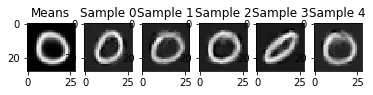

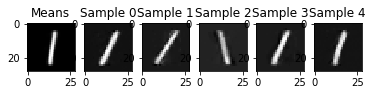

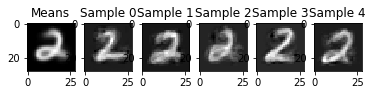

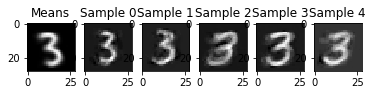

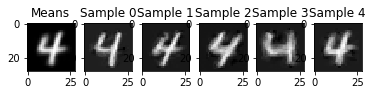

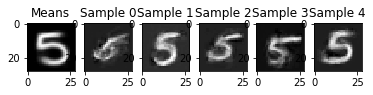

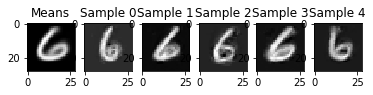

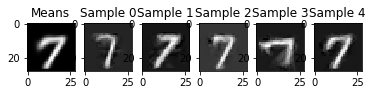

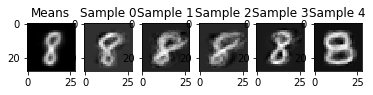

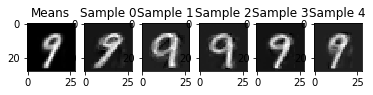

In [41]:
for k in range(clf.K):
    sample, mean = clf.sample_given_y(k)
    
    plt.subplot(1,6,1)
    plt.imshow(mean.reshape(28,28), cmap='gray')
    plt.title('Means')
    
    #cov   = clf.gaussians[k]['cov'].reshape(28, 28, 784).mean(axis=2)
    
    #plt.subplot(1,6,2)
    #plt.imshow(cov, cmap='gray')
    #plt.title('Covar')
    
    for i in range(5):
        sample, _ = clf.sample_given_y(k)
        plt.subplot(1, 6, 2+i)
        plt.imshow(sample.reshape(28,28), cmap='gray')
        plt.title('Sample '+str(i))
    plt.show()
    

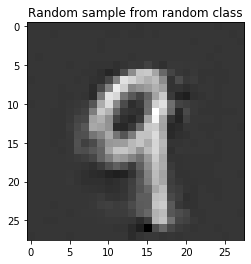

In [38]:
sample,_ = clf.sample()

plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title('Random sample from random class')
plt.show()